<a href="https://colab.research.google.com/github/Uriel-MCarvalho/CIENCIA-DE-DADOS/blob/main/Python_Employee_dataset_notebookc907889c3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


In [ ]:
#Carregando pacotes
import matplotlib.pyplot as plt
import seaborn as sns

## Contexto do Projeto: Análise de Dados dos Funcionários de uma Empresa

Este projeto tem como objetivo realizar uma análise abrangente dos dados de funcionários de uma empresa, abordando uma variedade de aspectos, incluindo formação educacional, histórico de trabalho, informações demográficas e fatores relacionados ao emprego. O conjunto de dados foi cuidadosamente anonimizado para proteger a privacidade dos funcionários, ao mesmo tempo em que oferece informações valiosas sobre a força de trabalho.


Esta análise de dados visa fornecer insights valiosos sobre os funcionários da empresa, bem como entender os fatores que podem estar relacionados com as decisões de permanência ou saída dos funcionários. As informações obtidas a partir deste projeto podem ser úteis para a gestão de recursos humanos, tomada de decisões estratégicas e aprimoramento do ambiente de trabalho.



# Passo a passo da análise:
*     Visualizar os dados
*     Identificar a natureza dos dados .info() e .describe()
*     Histogramas e BoxPlots
*     Contagem de valores
*     Buscar dados faltantes
*     Correções entre métricas
*     Explocação do tema
    


# Visualizar e identificar a natureza dos dados

In [ ]:
#Para visualizar os dados basta carregar e definir o nome do dataset
df = pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
print(df.head(20)) #Aqui podemos visualizar as 20 primeiras linhas do dataset

#Para identificar a natureza dos dados, assim como algumas informações estatísticas
print(df.info())
print(df.describe())



### Sobre o Conjunto de Dados:

* Education (Educação): Fornece informações sobre o nível de educação dos funcionários Bacharelado, Mestrado e Doutorado.
* JoiningYear (Ano de Admissão): Indica o ano em que os funcionários ingressaram na empresa.
* City (Cidade): Registra a cidade em que os funcionários estão, ou seja, unidade da empresa.
* PaymentTier (Nível de Remuneração): Descreve o nível de remuneração dos funcionários onde, baseado na quantiadade, 3 é o nível mais baixo e 1 o mais alto.
* Age (Idade): Indica a idade dos funcionários.
* Gender (Gênero): Registra o gênero dos funcionários.
* EverBenched (Tempo desempregado): Indica se um funcionário já ficou temporariamente sem trabalho atribuído.
* ExperienceInCurrentDomain (Experiência no Domínio Atual): Reflete a experiência dos funcionários em seu domínio de trabalho atual.
* LeaveOrNot (Deixar ou Não): Esta é a variável alvo que registra se um funcionário deixou ou permanece na empresa.


# Histogramas e Box Plots

#### Sobre as Cidades:
No contexto deste conjunto de dados, três cidades-chave são de particular interesse: Bangalore, Pune e New Delhi. Essas cidades representam diferentes localizações geográficas na Índia e podem ter influência sobre vários aspectos do emprego, como oportunidades de carreira, padrões de trabalho e qualidade de vida.


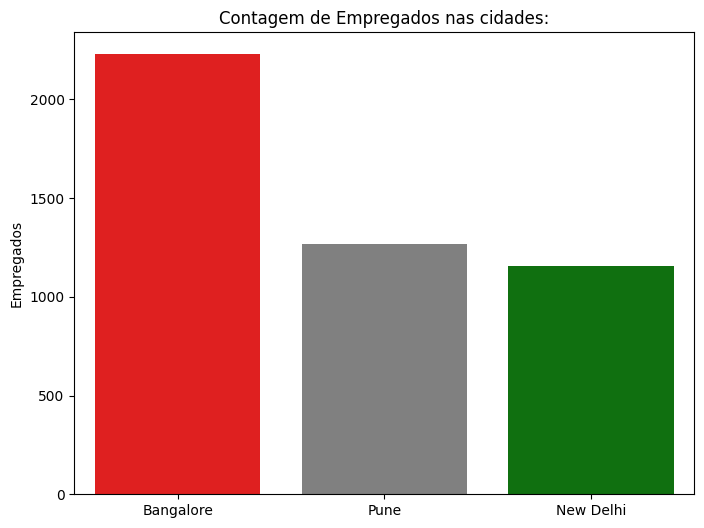

In [ ]:
# Gráfico de barras Cidades
cores_cidade={'Bangalore':'red','Pune':'gray', 'New Delhi':'green'} #Definir mapeamento de cores
plt.figure(figsize=(8, 6))
sns.countplot(x='City', data=df, palette=cores_cidade)
plt.xlabel('')
plt.ylabel('Empregados')
plt.title('Contagem de Empregados nas cidades:')
plt.show()

### Sobre Educação e Nível de Pagamento

Ao considerar as três variações de níveis educacionais e de pagamentos disponíveis nos dados, procuramos identificar uma correlação entre eles. No entanto, conforme evidenciado pelos gráficos abaixo, fica evidente que há um fator adicional que influencia os salários além da escolaridade.




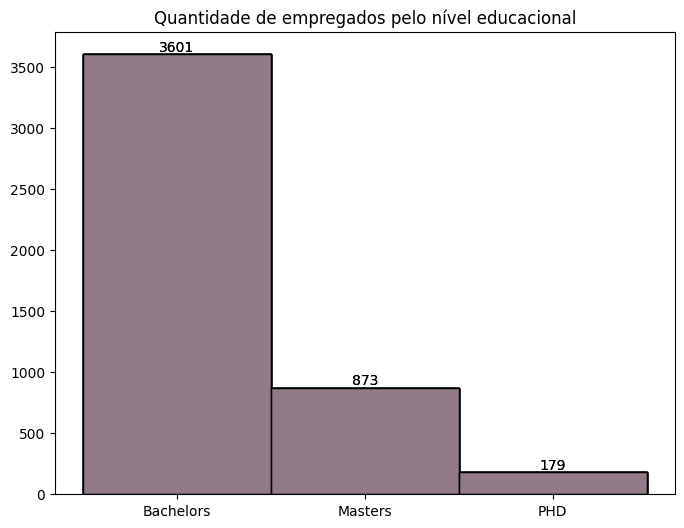

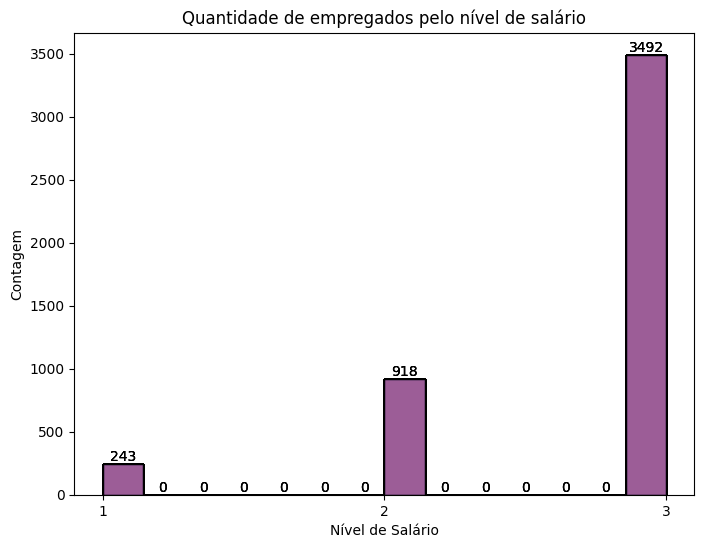

In [ ]:
#Sobre Educação
plt.figure(figsize=(8,6))
sns.histplot(df['Education'])

## Adicione rótulos para as contagens sobre cada coluna
for p in sns.histplot(df['Education']).patches:
    sns.histplot(df['Education']).annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Quantidade de empregados pelo nível educacional')
plt.xlabel('')
plt.ylabel('')
plt.show()

#Sobre Nível de pagamento
plt.figure(figsize=(8, 6))
sns.histplot(df['PaymentTier'])

# Defina os rótulos do eixo x como números inteiros
int_values = df['PaymentTier'].unique().astype(int)
sns.histplot(df['PaymentTier']).set_xticks(int_values)

# Adicione rótulos para as contagens sobre cada coluna
for p in sns.histplot(df['PaymentTier']).patches:
    sns.histplot(df['PaymentTier']).annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Quantidade de empregados pelo nível de salário')
plt.xlabel('Nível de Salário')
plt.ylabel('Contagem')
plt.show()

A análise sugere que outras variáveis ou fatores, como experiência no domínio, podem estar desempenhando um papel significativo na determinação dos níveis salariais. Para uma compreensão mais completa e precisa dessas influências, é necessário explorar e investigar mais profundamente os dados.


# Buscando uma correlação para o nível Salárial

## Região



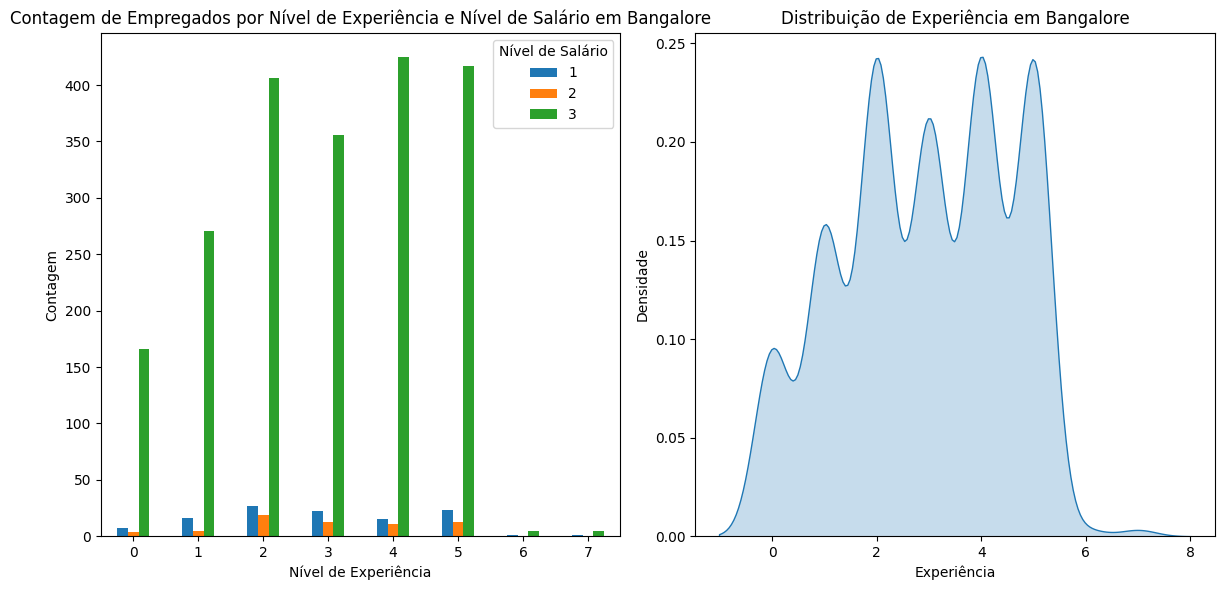

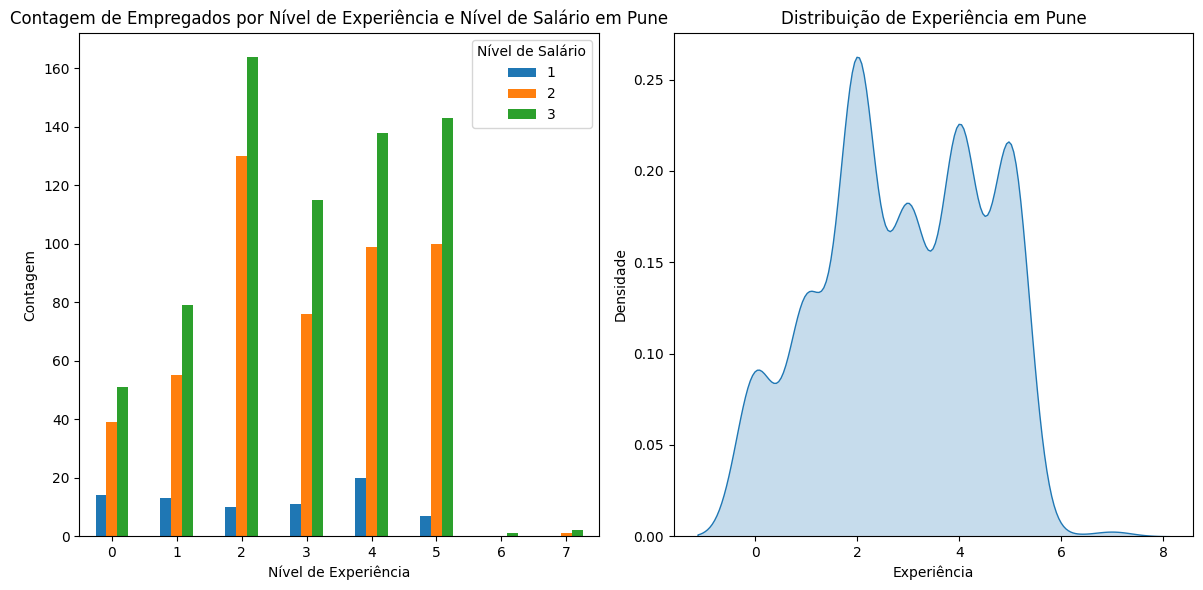

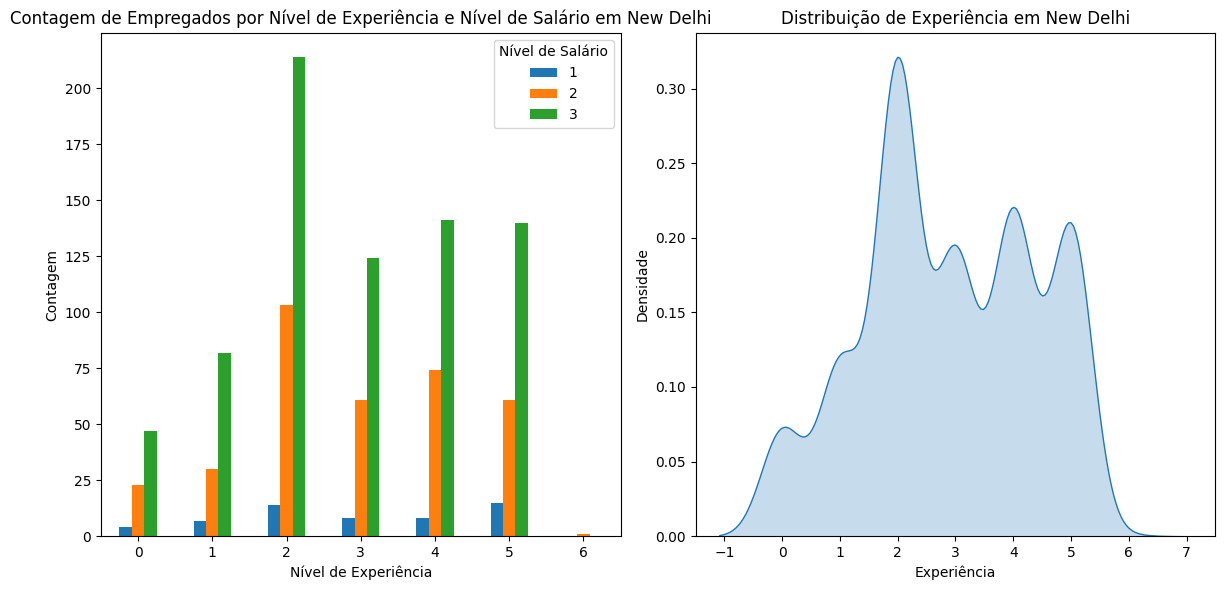

In [ ]:
# Lista das cidades únicas
cidades_unicas = df['City'].unique()

# Loop para criar um gráfico para cada cidade
for cidade in cidades_unicas:
    # Filtra o DataFrame para a cidade atual
    df_cidade = df[df['City'] == cidade]

    # Cria um DataFrame pivot para contar as combinações de níveis de experiência e níveis de salário
    df_pivot = pd.pivot_table(df_cidade, index='ExperienceInCurrentDomain', columns='PaymentTier', values='Education', aggfunc='count')

    # Plota o gráfico de barras agrupadas
    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(121)
    df_pivot.plot(kind='bar', ax=ax1)
    plt.title(f'Contagem de Empregados por Nível de Experiência e Nível de Salário em {cidade}')
    plt.xlabel('Nível de Experiência')
    plt.ylabel('Contagem')
    plt.legend(title='Nível de Salário')
    plt.xticks(rotation=0)

    # Adiciona um gráfico de densidade (KDE) ao lado do gráfico de barras
    ax2 = plt.subplot(122)
    sns.kdeplot(df_cidade['ExperienceInCurrentDomain'], fill=True, label='Experiência', ax=ax2)
    plt.title(f'Distribuição de Experiência em {cidade}')
    plt.xlabel('Experiência')
    plt.ylabel('Densidade')
    plt.tight_layout()

    # Exibe os gráficos
    plt.show()

In [ ]:
# Filtra o DataFrame para funcionários com mais de 5 anos de experiência e ativos
funcionarios_ativos = df[(df['ExperienceInCurrentDomain'] > 5) & (df['LeaveOrNot'] == 0)]

# Conta o número de funcionários ativos com mais de 5 anos de experiência
quantidade_funcionarios_ativos = len(funcionarios_ativos)

# Descreve estatísticas dos dados dos funcionários ativos com mais de 5 anos de experiência
#print(funcionarios_ativos.describe())

print(funcionarios_ativos)

print(f"Total de funcionários ativos com mais de 5 anos de experiência: {quantidade_funcionarios_ativos}")



      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
3960  Bachelors         2016  Bangalore            3   39    Male          No   
3962  Bachelors         2016       Pune            3   38  Female          No   
3963  Bachelors         2016  Bangalore            3   33    Male          No   
3964  Bachelors         2014       Pune            3   33    Male          No   
3969  Bachelors         2017  Bangalore            3   33  Female          No   
3972  Bachelors         2017  New Delhi            2   33    Male          No   
3981  Bachelors         2013  Bangalore            3   34    Male          No   
3982  Bachelors         2012  Bangalore            1   35    Male          No   
3985  Bachelors         2015       Pune            3   34    Male         Yes   
3987  Bachelors         2013  Bangalore            1   38    Male          No   
3988  Bachelors         2016  Bangalore            3   38  Female          No   
3989  Bachelors         2015

Após a análise dos gráficos, destacou-se uma tendência geral nas regiões, com a exceção de Bangalore, que se destaca pelo elevado número de funcionários com experiência. Entretanto, notou-se que, independentemente da região, o número de funcionários tende a diminuir significativamente após a segunda metade do quinto ano de experiência.

Ao analisar os dados acima, identificamos que apenas 12 funcionários possuem mais de 5 anos de experiência. Dentre esses, apenas 2 são do sexo masculino e recebem salário no nível 1, 2 (sendo um homem e uma mulher) recebem salário no nível 2, enquanto os demais estão no nível 3. É notável que todos esses funcionários possuem apenas formação de bacharelado, o que pode ser um indicativo de sua longevidade na empresa.

## Gênero

É amplamente reconhecido que historicamente as mulheres enfrentam disparidades salariais em relação aos homens. Portanto, conduzimos uma análise para investigar se essa tendência persiste nesta empresa. Para isso, selecionamos dados em que os funcionários possuem o mesmo nível de escolaridade e experiência, diferenciando-se apenas pelo gênero, sem considerar a idade inicialmente.

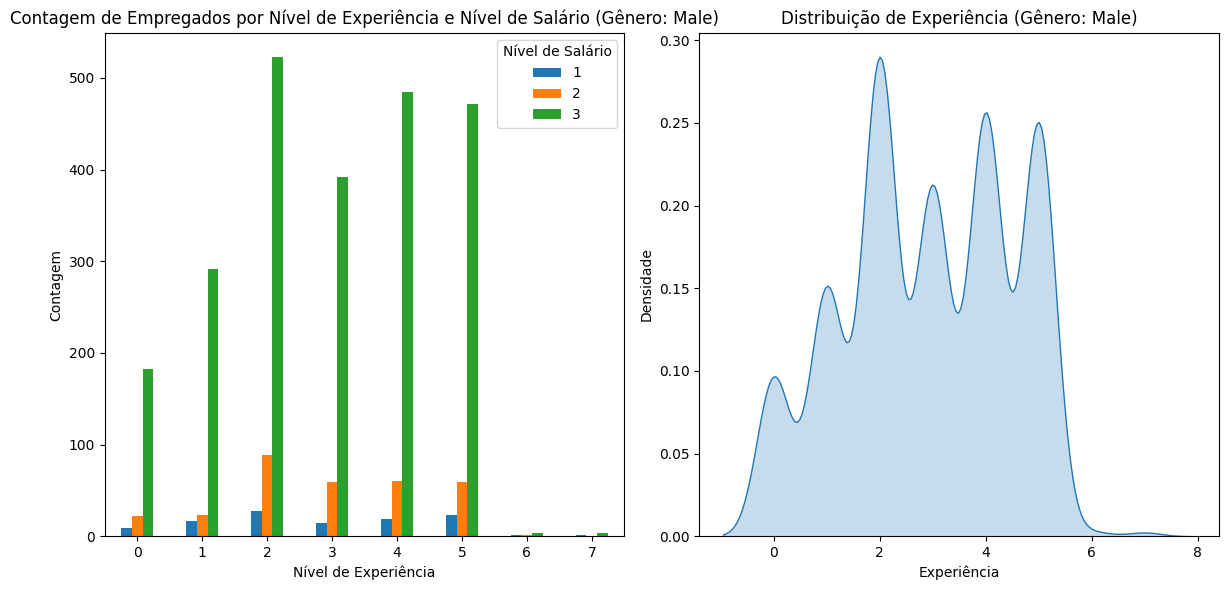

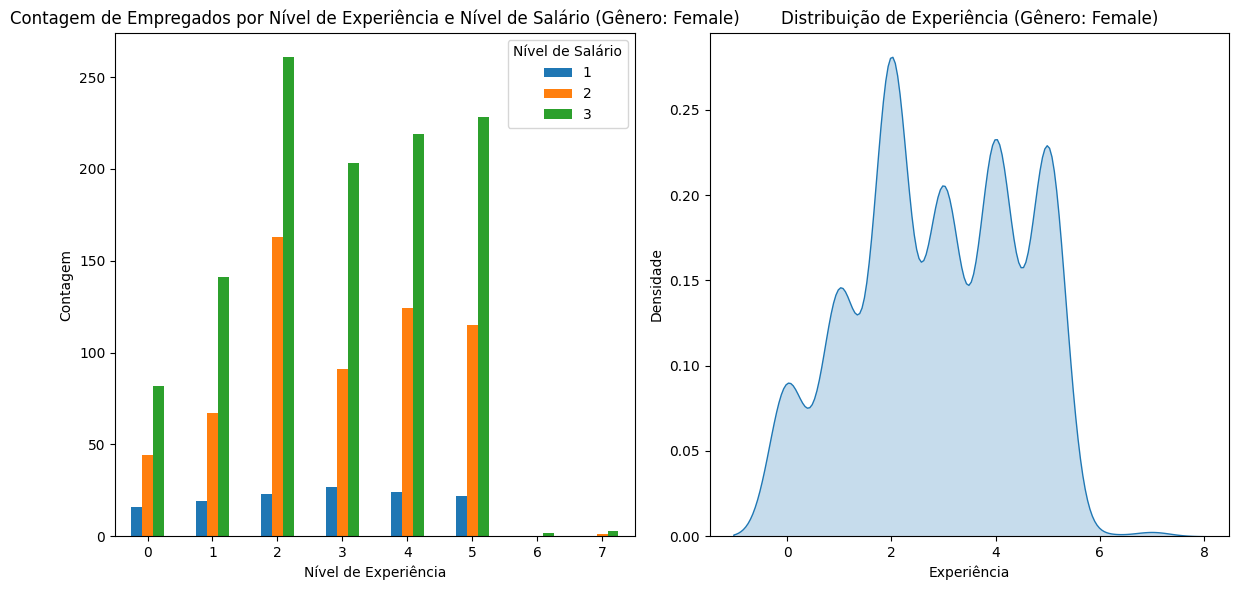

In [ ]:
# Lista dos gêneros únicos
generos_unicos = df['Gender'].unique()

# Loop para criar um gráfico para cada gênero
for genero in generos_unicos:
    # Filtra o DataFrame para o gênero atual
    df_genero = df[df['Gender'] == genero]

    # Crie um DataFrame pivot para contar as combinações de níveis de experiência e níveis de salário
    df_pivot = pd.pivot_table(df_genero, index='ExperienceInCurrentDomain', columns='PaymentTier', values='Education', aggfunc='count')

    # Plota o gráfico de barras agrupadas
    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(121)
    df_pivot.plot(kind='bar', ax=ax1)
    plt.title(f'Contagem de Empregados por Nível de Experiência e Nível de Salário (Gênero: {genero})')
    plt.xlabel('Nível de Experiência')
    plt.ylabel('Contagem')
    plt.legend(title='Nível de Salário')
    plt.xticks(rotation=0)

    # Adiciona um gráfico de densidade (KDE) ao lado do gráfico de barras
    ax2 = plt.subplot(122)
    sns.kdeplot(df_genero['ExperienceInCurrentDomain'], fill=True, label='Experiência', ax=ax2)
    plt.title(f'Distribuição de Experiência (Gênero: {genero})')
    plt.xlabel('Experiência')
    plt.ylabel('Densidade')
    plt.tight_layout()

    # Exibe os gráficos
    plt.show()

Surpreendentemente, os resultados da análise revelam que, nesta empresa específica, as disparidades salariais de gênero não se manifestam de forma significativa. A diferença na remuneração entre homens e mulheres pode ser atribuída, em grande parte, ao fato de que a maioria dos funcionários na empresa é do sexo masculino. No entanto, não é possível concluir se existe algum tipo de viés de contratação com base nos dados disponíveis.



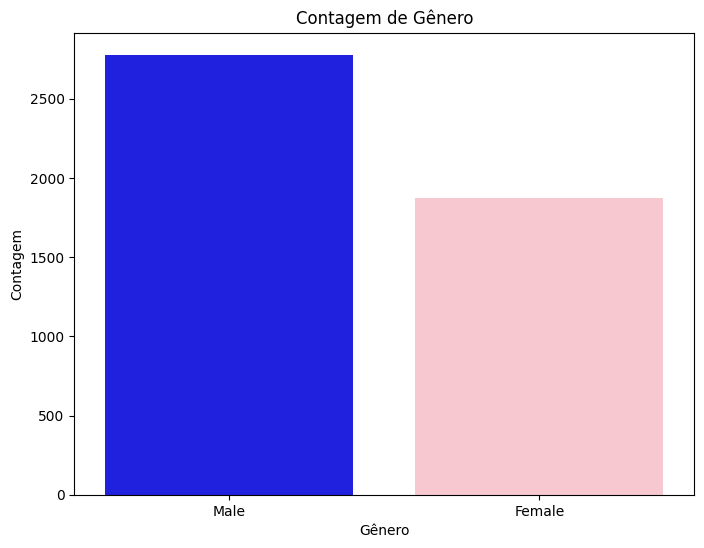

In [ ]:
# Gráfico de barras para o gênero
cores_genero={'Male':'blue','Female':'pink'} #Definir mapeamento de cores
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette=cores_genero)
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de Gênero')
plt.show()


Essa análise inicial sugere que, pelo menos em termos de remuneração, a empresa está promovendo uma igualdade de gênero, mas é importante continuar monitorando e investigando a equidade em outros aspectos, como oportunidades de promoção e contratação, para obter uma imagem mais completa da situação.

Por fim, vamos verificar a quantidade de funcionários ativos na empresa e comparar com

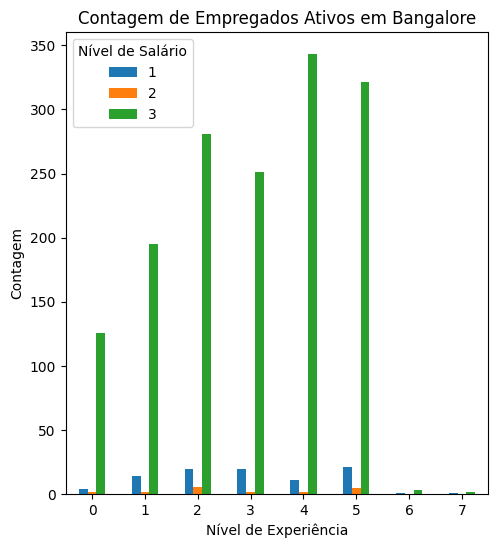

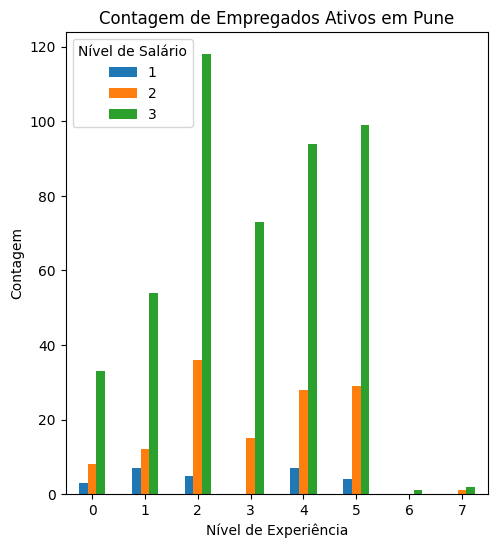

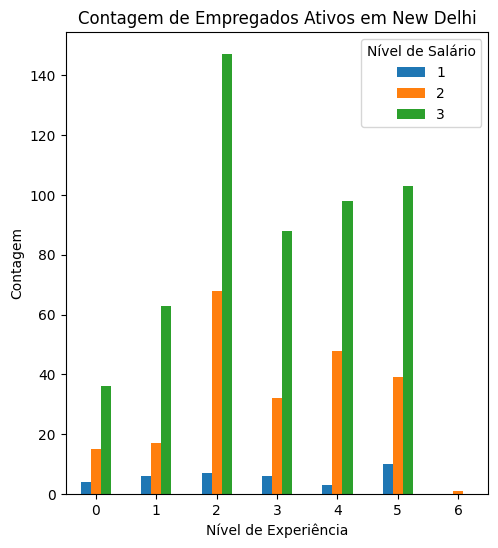

In [ ]:
# Lista das cidades únicas
cidades_unicas = df['City'].unique()

# Loop para criar um gráfico para cada cidade
for cidade in cidades_unicas:
    # Filtra o DataFrame para a cidade atual e funcionários com LeaveOrNot igual a 0
    df_cidade = df[(df['City'] == cidade) & (df['LeaveOrNot'] == 0)]

    # Cria um DataFrame pivot para contar as combinações de níveis de experiência e níveis de salário
    df_pivot = pd.pivot_table(df_cidade, index='ExperienceInCurrentDomain', columns='PaymentTier', values='Education', aggfunc='count')

    # Plota o gráfico de barras agrupadas
    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(121)
    df_pivot.plot(kind='bar', ax=ax1)
    plt.title(f'Contagem de Empregados Ativos em {cidade}')
    plt.xlabel('Nível de Experiência')
    plt.ylabel('Contagem')
    plt.legend(title='Nível de Salário')
    plt.xticks(rotation=0)

    # Exibe os gráficos
    plt.show()


# Conclusão da Análise de Dados dos Funcionários
Nesta jornada de análise de dados dos funcionários da empresa, exploramos vários aspectos que forneceram insights valiosos sobre a composição e dinâmica da força de trabalho. Vamos resumir as principais conclusões derivadas de nossa análise abrangente:

#### 1. Educação e Nível de Pagamento
Observamos uma correlação entre o nível educacional e o nível de pagamento, onde funcionários com níveis mais elevados de educação tendem a receber salários mais altos.
No entanto, a análise também sugeriu que outros fatores, como a experiência no domínio, desempenham um papel importante na determinação dos salários, indicando que a escolaridade não é o único critério.
#### 2. Distribuição Geográfica
Analisando as cidades em que a empresa está presente (Bangalore, Pune e Nova Delhi), notamos que Bangalore se destaca por ter o maior número de funcionários com experiência, possivelmente devido ao seu papel como centro tecnológico.
Além disso, em todas as regiões, observamos uma tendência de diminuição no número de funcionários após a segunda metade do quinto ano de experiência.
#### 3. Gênero
Conduzimos uma análise em relação ao gênero e identificamos que, surpreendentemente, não há disparidades salariais significativas entre homens e mulheres nesta empresa. Qualquer diferença na remuneração pode ser atribuída à predominância de funcionários do sexo masculino, e não a um viés de pagamento.
#### 4. Possibilidade de Funcionários mais Instruídos Deixarem a Empresa
Como mencionado anteriormente, o número de funcionários com mais de 5 anos de experiência é muito reduzido em relação ao total de empregados. Nota-se uma tendência de saída de funcionários que possuem níveis educacionais superiores ao bacharelado, possivelmente atraídos por oportunidades em empresas concorrentes. Esta observação destaca a importância de compreender e abordar os fatores que influenciam a retenção de funcionários altamente instruídos, a fim de garantir a estabilidade e o crescimento da equipe.